# The Avenger Classifier 💫

### Face Detection using Haar Cascades

<br>

<img src="https://wallpaperaccess.com/full/884080.jpg" width=800>

This project classifies the faces of the 5 following Avengers:
- Chris Evans 
- Chris Hemsworth
- Robert Downey Jr.
- Scarlett Johansson 
- Tom Holland 


---


In [23]:
# Import needed modules
import numpy as np
import cv2 
import matplotlib
from matplotlib import pyplot as plt
%matplotlib inline

<br>

## Preprocessing

### 1. Detecting face and eyes

First, we try reading a test image using the`imread` function from the `cv2` module.

In [24]:
# output: (width, height, rgb value)

img = cv2.imread('test_images/scarlett.jpeg')
img.shape

(3000, 1750, 3)

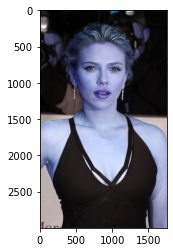

In [25]:
plt.imshow(img)

<br>

**Then, we convert the image to grayscale using the `cvtColor` function.**

In [46]:
gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)

gray.shape

(3000, 1750)

In [47]:
gray

array([[  4,   4,   3, ...,   8,   6,   6],
       [  5,   4,   4, ...,   6,   5,   9],
       [  1,   2,   3, ...,   4,   4,  10],
       ...,
       [147, 152, 151, ..., 162, 163, 159],
       [152, 153, 154, ..., 162, 161, 161],
       [165, 156, 153, ..., 160, 157, 164]], dtype=uint8)

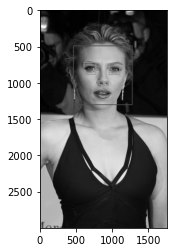

In [48]:
# print out the gray image
plt.imshow(gray, cmap="gray")

**Create a face and eye detector with OpenCV.**

In [29]:
face_cascade = cv2.CascadeClassifier("opencv/haarcascades/haarcascade_frontalface_default.xml")
eye_cascade = cv2.CascadeClassifier("opencv/haarcascades/haarcascade_eye.xml")

<br>

**Now we try to detect the face on the image - `gray` we just created above.**

`detectMultiScale` - Detects objects of different sizes in the input image. The detected objects are returned as a list of rectangles.

In [30]:
# returns an array of of detected faces, each with (x, y, width, height) 

faces = face_cascade.detectMultiScale(gray, 1.3, 5)  # (img, scaleFactor, minNeighbors)

faces

array([[460, 493, 810, 810]], dtype=int32)

In [31]:
(x,y,w,h) = faces[0]
x,y,w,h

(460, 493, 810, 810)

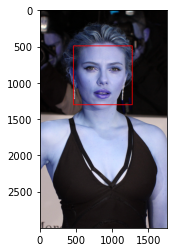

In [32]:
# draws a red rectangle that indicates the face region

face_img = cv2.rectangle(img,(x,y),(x+w,y+h),(255,0,0),10)
plt.imshow(face_img)

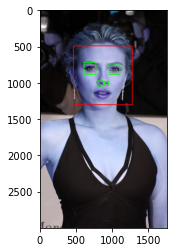

In [33]:
cv2.destroyAllWindows()

faces = face_cascade.detectMultiScale(gray, 1.3, 5)
for (x,y,w,h) in faces:
    face_img = cv2.rectangle(img, (x,y),(x+w,y+h),(255,0,0),10)      # draws red rectangle for face
    
    roi_gray = gray[y:y+h, x:x+w]       # cropped detected face in grayscale
    roi_color = face_img[y:y+h, x:x+w]  # cropped detected face in color
    
    eyes = eye_cascade.detectMultiScale(roi_gray)
    for(ex,ey,ew,eh) in eyes:
        cv2.rectangle(roi_color,(ex,ey),(ex+ew, ey+eh),(0,255,0),10) # draw green rectangles for eyes

plt.figure()
plt.imshow(face_img, cmap='gray')
plt.show()

### 2. Cropping the facial region of the image

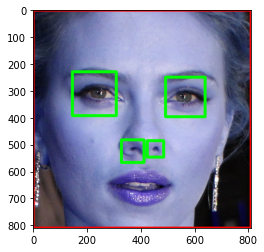

In [34]:
%matplotlib inline
plt.imshow(roi_color, cmap='gray')

<br>

## Image Processing

### 1. Write and test a function that combines step 1 and 2

We write a function called `get_cropped_image` that takes in an image path and transforms ONE input image to a cropped image with only the face region IF the face is visible and at least 2 eyes are detected.

If the two conditions fail, then nothing is returned.

In [45]:
def get_cropped_image(image_path):
    
    # prevents ipynb_checkpoints files from creating errors for imread
    if (not image_path.endswith("ipynb_checkpoints")):      
        img = cv2.imread(image_path)
        gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

        faces = face_cascade.detectMultiScale(gray, 1.3, 5)
        for (x,y,w,h) in faces:
            roi_gray = gray[y:y+h, x:x+w]
            roi_color = img[y:y+h, x:x+w]

            eyes = eye_cascade.detectMultiScale(roi_gray)

    # return cropped img in color if at least 2 eyes are detected
            if len(eyes) >= 2:      
                return roi_color

<br>

Test the function on another image in the `test_image` folder named `tom.jpeg`.

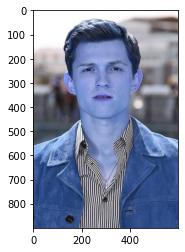

In [36]:
# prints orignal image
tom = cv2.imread("test_images/tom.jpeg")
plt.imshow(tom)

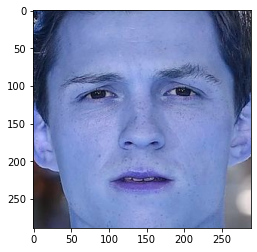

In [37]:
# prints cropped image
tom_cropped = get_cropped_image("test_images/tom.jpeg")
plt.imshow(tom_cropped)

<br>

Now, let us test the function on another image of Tom Holland with his face at an angle. This time, no cropped image should be returned!

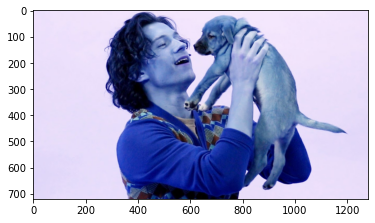

In [38]:
# prints original image
tom_side = cv2.imread("test_images/tom_side.jpeg")
plt.imshow(tom_side)

In [39]:
# prints cropped image
tom_side_cropped = get_cropped_image("test_images/tom_side.jpeg")
tom_side_cropped    # nothing is returned indeed!

<br>

### 2. Crop all Avenger images in the `dataset` folder

Using the `os` module, we create a list called `img_dirs` that contains paths to each individual Avenger's images folder.

In [40]:
path_to_data = "./dataset/"
path_to_cropped_data = "./dataset/cropped/"

In [41]:
import os

img_dirs = []

# go through all sub-directories in the dataset folder 
# and store their path in img_dirs

for entry in os.scandir(path_to_data):
    if entry.is_dir() and (entry.path != './dataset/.ipynb_checkpoints') :
        img_dirs.append(entry.path)
        
img_dirs

['./dataset/robert_downey_jr',
 './dataset/chris_hemsworth',
 './dataset/chris_evans',
 './dataset/scarlett_johansson',
 './dataset/tom_holland']

<br>

Create a folder called `cropped` inside the `dataset` folder (if one already exists, remove it and create a new one)

In [42]:
import shutil

if os.path.exists(path_to_cropped_data):
    shutil.rmtree(path_to_cropped_data)    # remove existing folder
    
os.mkdir(path_to_cropped_data)             # create new folder

<br>

Create a list called `cropped_image_dirs` that contains the cropped images folder (path) for each Avenger. Then, create a dictionary called `avenger_file_names_dict` that will have [Avenger name, list of image file paths] key value pairs.

In [43]:
cropped_image_dirs = []
avenger_file_names_dict = {}

<br>



In [44]:
for img_dir in img_dirs:
    count = 1                                   # initialize count for file name
    avenger_name = img_dir.split('/')[-1]       # taking the last element of the list (name of avenger)
    print("Now processing: ", avenger_name)
    
    avenger_file_names_dict[avenger_name] = []  # set value of the avenger name key to an empty array
    
    # for each image in an avenger folder
    for entry in os.scandir(img_dir):     
       
        roi_color = get_cropped_image(entry.path)

    # if the img's face and eyes are visible
        if roi_color is not None:         
            cropped_folder = path_to_cropped_data + avenger_name

    # create a cropped folder for that avenger if it doesn't exist already
            if not os.path.exists(cropped_folder):  
                os.makedirs(cropped_folder)
                cropped_image_dirs.append(cropped_folder)
                print("Generating cropped images in folder: ", cropped_folder)

            cropped_file_name = avenger_name + str(count) + ".png"
            cropped_file_path = cropped_folder + "/" + cropped_file_name

            cv2.imwrite(cropped_file_path, roi_color)
            avenger_file_names_dict[avenger_name].append(cropped_file_path)
            count += 1
            
    print("Done")

Now processing:  robert_downey_jr
Generating cropped images in folder:  ./dataset/cropped/robert_downey_jr
Done
Now processing:  chris_hemsworth
Generating cropped images in folder:  ./dataset/cropped/chris_hemsworth
Done
Now processing:  chris_evans
Generating cropped images in folder:  ./dataset/cropped/chris_evans
Done
Now processing:  scarlett_johansson
Generating cropped images in folder:  ./dataset/cropped/scarlett_johansson
Done
Now processing:  tom_holland
Generating cropped images in folder:  ./dataset/cropped/tom_holland
Done


<br>

## Feature Engineering Using Wavelet Transformation

Define a function called `w2d` that extracts important facial features into a wavelet transformation image using the `pywt` module. The wavelet transformation images will ultimately help our classifier distinguish between different faces.

In [59]:
# Source: stackoverflow

import numpy as np
import pywt
import cv2

def w2d(img, mode="haar", level=1):
    imArray = img
    
    # convert to grayscale
    imArray = cv2.cvtColor(imArray, cv2.COLOR_RGB2GRAY)
    
    # convert to float
    imArray = np.float32(imArray)
    imArray /= 255
    
    # compute coefficients
    coeffs = pywt.wavedec2(imArray, mode, level=level)
    
    # process coefficients
    coeffs_H = list(coeffs)
    coeffs_H[0] *= 0
    
    # reconstructoin
    imArray_H = pywt.waverec2(coeffs_H, mode)
    imArray_H *= 255;
    imArray_H = np.uint8(imArray_H)
    
    return imArray_H

<br>

Let's try the function on the `tom_cropped` image we created earlier and turn it into a wavelet transformed image.

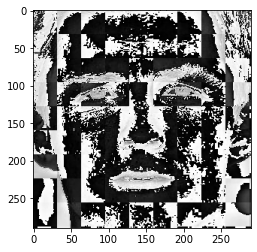

In [57]:
tom_wave = w2d(tom_cropped, 'db1', 5)
plt.imshow(tom_wave, cmap='gray')

<br>

Create a `class_dict` dictionary and assign each Avenger a number (this will be useful very soon)

In [62]:
class_dict = {}
count = 0
for avenger_name in avenger_file_names_dict.keys():
    class_dict[avenger_name] = count
    count += 1

class_dict

{'robert_downey_jr': 0,
 'chris_hemsworth': 1,
 'chris_evans': 2,
 'scarlett_johansson': 3,
 'tom_holland': 4}

<br>

Now we want to iterate through the `avenger_file_names_dict` dictionary and do the following to each image:
1. Scale the **original** (raw) image to 32x32 px
2. **Wavelet transform** the image and scale it to 32x32 px
3. Create a combined image by **stacking** the raw image above the wavelet transformed image and append it into list `X`
4. Append the number of the Avenger into list `Y`


In [74]:
# create X and Y lists for model training
X = []
Y = []

for avenger_name, training_files in avenger_file_names_dict.items():    # iterate through every Avenger
    for training_image in training_files:                               # iterate through every image of that Avenger
        img = cv2.imread(training_image)
        scaled_img_raw = cv2.resize(img, (32,32))                       # scale the raw image
        
        img_wave = w2d(img, 'db1', 5)
        scaled_img_wave = cv2.resize(img_wave, (32,32))                 # scale the wavelet transform image
        
        combined_img = np.vstack((scaled_img_raw.reshape(32*32*3,1), scaled_img_wave.reshape(32*32,1)))
        X.append(combined_img)
        Y.append(class_dict[avenger_name])

In [75]:
# Prints the length of the image list

len(X)

218

#### Now all data cleaning needed to build the classifier is done!🎊

---

<br>

### Model Training